In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [145]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [146]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [147]:
df.shape

(200, 5)

In [148]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [149]:
df.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [151]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [152]:
print(df.corr())

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<ipython-input-152-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-153-2c3116ea1097>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


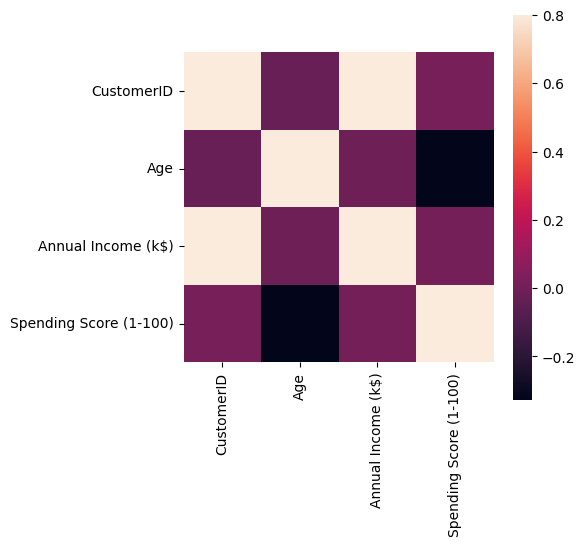

In [153]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [154]:
colmns = df.select_dtypes(include='int').columns.tolist()

In [155]:
colmns

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<Axes: >

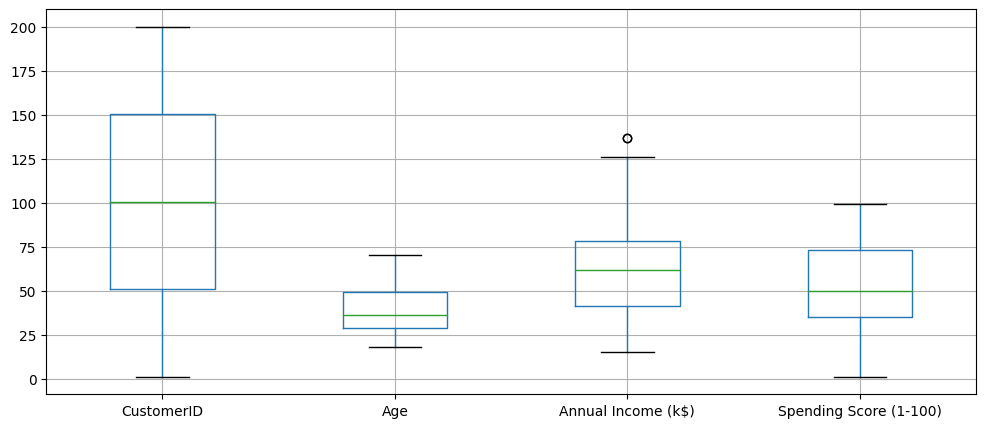

In [156]:
plt.figure(figsize=(12,5))
df.boxplot(colmns,vert=True)

In [157]:
threshold = 125
# Calculate the mean of the column
mean_value = df['Annual Income (k$)'].mean()
# Replace values greater than the threshold with the mean
df['Annual Income (k$)'] = df['Annual Income (k$)'].apply(lambda x: mean_value if x > threshold else x)


<Axes: >

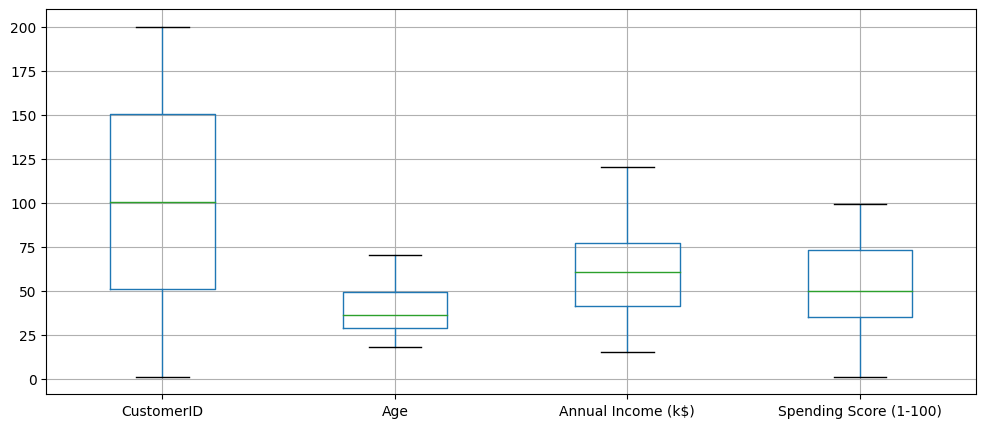

In [158]:
plt.figure(figsize=(12,5))
df.boxplot(colmns,vert=True)

Text(0.5, 1.0, 'Histogram 3')

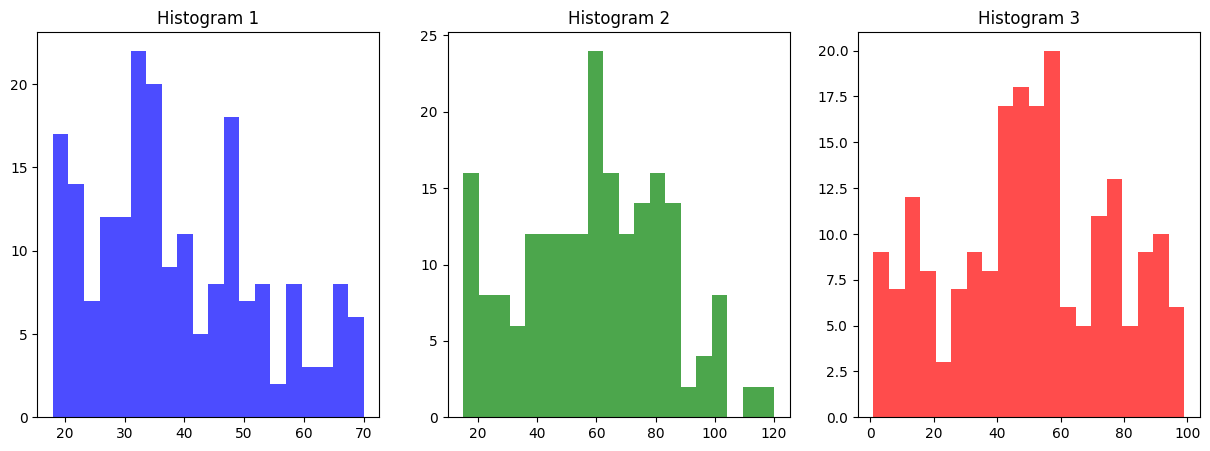

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
data1 = df['Age']
data2 = df["Annual Income (k$)"]
data3 = df['Spending Score (1-100)']


# Data distribution with Histogram
axes[0].hist(data1, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram 1')

axes[1].hist(data2, bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram 2')

axes[2].hist(data3, bins=20, color='red', alpha=0.7)
axes[2].set_title('Histogram 3')

<Axes: >

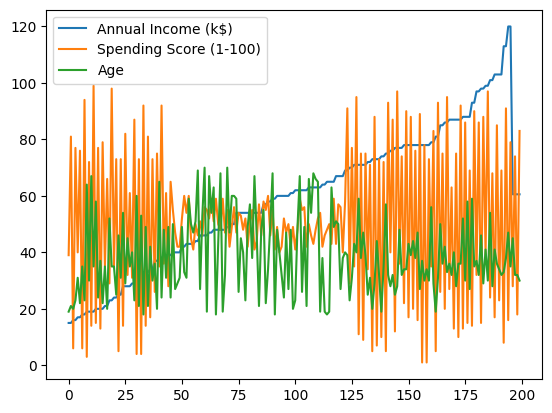

In [160]:
columns_to_plot = ['Annual Income (k$)', 'Spending Score (1-100)','Age']
df.plot(y=columns_to_plot)

Text(0, 0.5, 'Spending score')

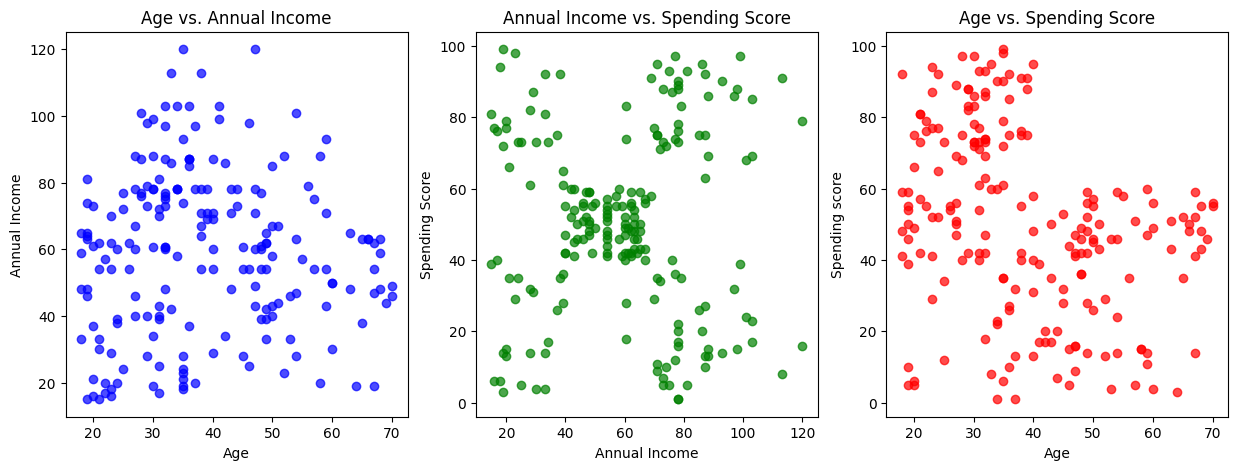

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
data1 = df['Age']
data2 = df["Annual Income (k$)"]
data3 = df['Spending Score (1-100)']


# Data distribution with Histogram
axes[0].scatter(x=data1, y = data2, color='blue', alpha=0.7)
axes[0].set_title('Age vs. Annual Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income')

axes[1].scatter(x=data2,y= data3, color='green', alpha=0.7)
axes[1].set_title('Annual Income vs. Spending Score')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Spending Score')

axes[2].scatter(x=data1,y=data3, color='red', alpha=0.7)
axes[2].set_title('Age vs. Spending Score')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Spending score')

<Axes: >

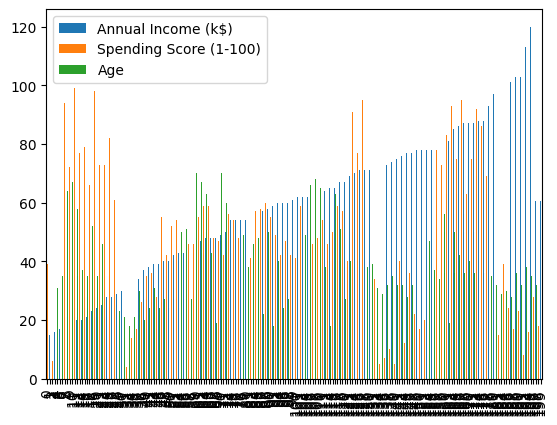

In [162]:
df.plot(kind="bar",y=columns_to_plot)

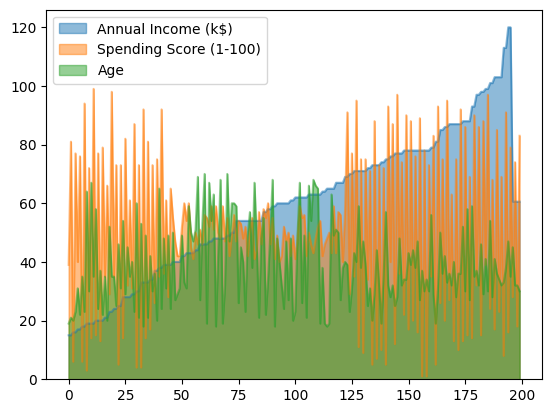

In [163]:

df.plot.area( y=columns_to_plot, alpha=0.5, stacked=False)
plt.legend(loc='upper left')
plt.show()


In [164]:
x=df.iloc[:,[3,4]].values

In [165]:
kmeansmodel = KMeans(n_clusters = 5 , init = "k-means++",random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


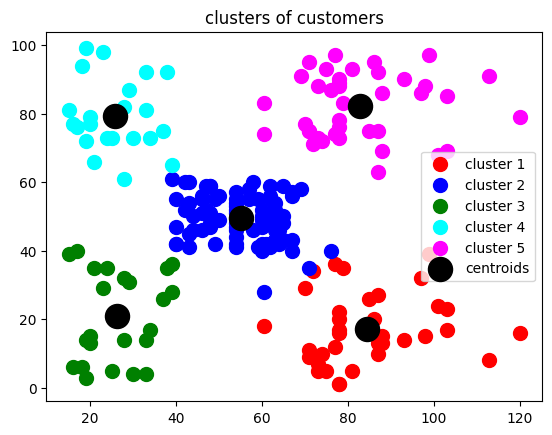

In [166]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="red",label = "cluster 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="blue",label = "cluster 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="green",label = "cluster 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c="cyan",label = "cluster 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c="magenta",label = "cluster 5")
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=300,c="black",label="centroids")
plt.title("clusters of customers")
plt.legend()
plt.show()